# Redes Neuronais + Backpropagation

In [26]:
from time import time
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

### Leitura de dados

In [7]:
data = pd.read_csv('./data_tp1', header=None)

In [8]:
features = data.loc[:, 1:]
target = data.loc[:, 0]

In [9]:
features.shape, target.shape

((5000, 784), (5000,))

In [15]:
Counter(target)

Counter({1: 571,
         2: 530,
         9: 520,
         7: 512,
         4: 500,
         3: 500,
         8: 489,
         6: 462,
         0: 460,
         5: 456})

O dado apresenta 10 classes com dígitos de 0 a 9 com observações de escrita manual aproximadamente bem distribuídas entre os dígitos. Cada dígito é representado por uma imagem de 28x28 pixels que quando transformada em um vetor contém 784 dimensões.

Portanto:
- O número de neurônios na camada de entrada deve igual a 784 para considerar todas as características disponíveis para o modelo
- O número de neurônios na camada de saída deve igual a 10 para predizer cada dígito separadamente

### Opções de hiperparâmetros [[docs](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)]

Inicialmente os seguintes parâmetros serão avaliados para o treinamento do modelo:
- Número de neurônios na camada escondida - variando entre `hidden_layer_sizes = 25; 50; 100`
- Função de loss do modelo
    - **Gradient Descent**: método que considera todas as iterações para atualizar o erro do modelo - `batch_size = 5000`
    - **Mini Batch**: método que considera um número de iterações menor que o número total de observações disponíveis para atualizar o erro do modelo - variando entre `batch_size = 10; 50`
    - **Stochastic Gradient Descent**: método que considera somente uma iteração para atualizar o erro do modelo - `batch_size = 1`
- Taxa de aprendizado - variando entre `learning_rate_inits = 0.5; 1; 10`


Além dos parâmetros que serão variados para avaliação de performance do modelo, os seguintes parâmetros devem permanecer fixos:

```python
activation = 'tanh' # Sigmoid
neuron_input = 784
neuron_output = 10
solver = 'sgd'
```

### Definição do modelo

Considerando inicialmente:

```python
hidden_layer_sizes = 100
batch_size = 1
learning_rate_inits = 0.5
```

A expectativa é que o modelo apresente:
- Lenta progressão de aprendizado - baixo valor de taxa de aprendizado
- Lenta execução - *batch size* muito baixo o número de atualizações do peso é muito grande
- Alta capacidade - 100 neurônios na camada escondida

In [58]:
model_00 = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes=100,
    solver = 'sgd',
    batch_size=1,
    learning_rate='constant',
    learning_rate_init=0.5,
)

st = time()
model_00.fit(features, target)
time_to_fit = time() - st

print(time_to_fit)

94.39199209213257


In [63]:
def print_metrics(model_):
    print({
        'accuracy': accuracy_score(
            y_pred=model_.predict(features),
            y_true=target,
        ),
        'best_loss': model_.best_loss_,
    })

In [64]:
print_metrics(model_00)

{'accuracy': 0.104, 'best_loss': 16262.146173811936}


In [67]:
def plot_loss(model_):
    plt.figure(figsize=(8, 3))
    plt.plot(model_.loss_curve_)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    plt.close()

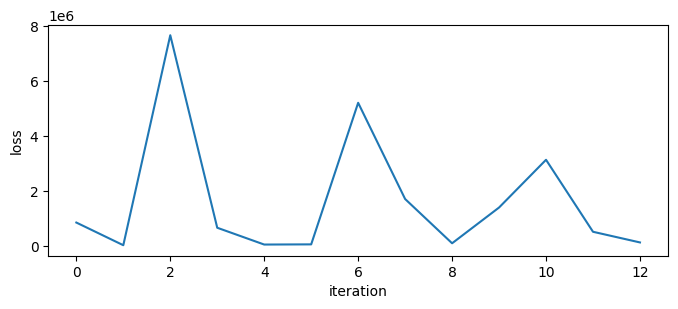

In [66]:
plot_loss(model_00)

Com a alteração do número de íterações máximo a acurácia no dado de treino e o melhor valor na função de *loss* não se alteram significativamente, apesar de aumentar o número de iterações até a saturação (momento em que não existe mais variação relevante no valor da função de perda). Nota-se que o modelo já alcança resultados muito bons no início da curva de valores da função de perda, portanto, o número elevado de iterações pode levar a sobre ajuste indesejado. O fato de o modelo ter quantidade elevada de neurônios na camada escondida facilita o aprendizado, mas também pode levar a sobre ajuste desnecessário.

### Análise de número de neurônios na camada escondida

Como estratégia para avaliar a performance de um modelo com menor capacidade no mesmo dado será alterado o parâmetro:

```python
hidden_layer_sizes=50
```

In [51]:
model_02 = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes=50,
    solver = 'sgd',
    max_iter=1024,
)

st = time()
model_01.fit(features, target)
time_to_fit = time() - st

print(time_to_fit)

42.90770673751831


In [52]:
print_metrics(model_01)

{'accuracy': 0.9842, 'best_loss': 0.06700983266666431}


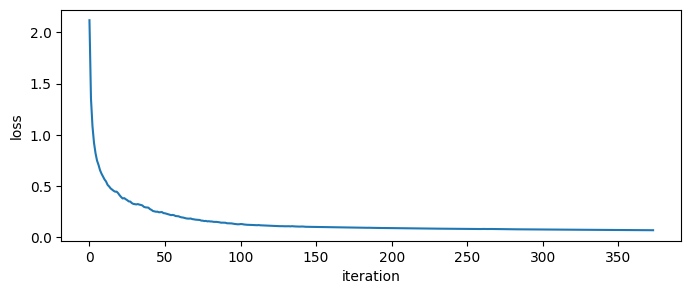

In [53]:
plot_loss(model_01)

O modelo com metade do número de neurônios na camada escondida apresenta performance similar e, portanto, não existe justificativa para manter o número de neurônios na camada escondida igual a 100

Como estratégia para avaliar a performance de um modelo com menor capacidade no mesmo dado será alterado o parâmetro:

```python
hidden_layer_sizes=25
```

In [54]:
model_02 = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes=50,
    solver = 'sgd',
    max_iter=1024,
)

st = time()
model_01.fit(features, target)
time_to_fit = time() - st

print(time_to_fit)

35.69162607192993


In [55]:
print_metrics(model_01)

{'accuracy': 0.9806, 'best_loss': 0.07848956138240953}


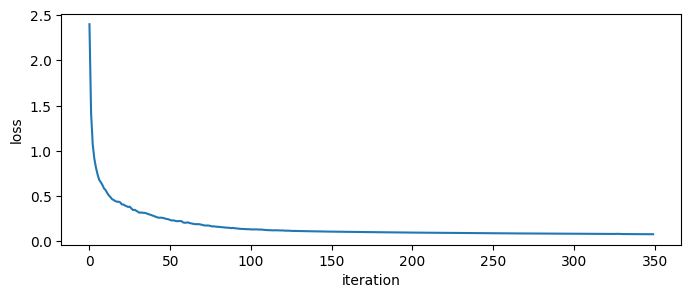

In [56]:
plot_loss(model_01)

O modelo com metade do número de neurônios na camada escondida apresenta performance similar e, portanto, não existe justificativa para manter o número de neurônios na camada escondida igual a 50. Portanto, pode-se manter rígida a definição de um modelo com o número de neurônios na camada escondida igual a 25.

### Avaliação de *batch size*

Como estratégia para acelerar o treinamento do modelo reduzindo tanto o tempo para treinamento quando o número de iterações necessárias para a saturação será alterado o parâmetro:

```python
batch_size=10
```

In [57]:
model_02 = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes=50,
    solver = 'sgd',
    max_iter=1024,
    batch_size=10,
)

st = time()
model_01.fit(features, target)
time_to_fit = time() - st

print(time_to_fit)

7.067926406860352


/home/maia/UFMG/202301-UFMG-DCCML/TP1/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print_metrics(model_01)

{'accuracy': 0.9842, 'best_loss': 0.06700983266666431}


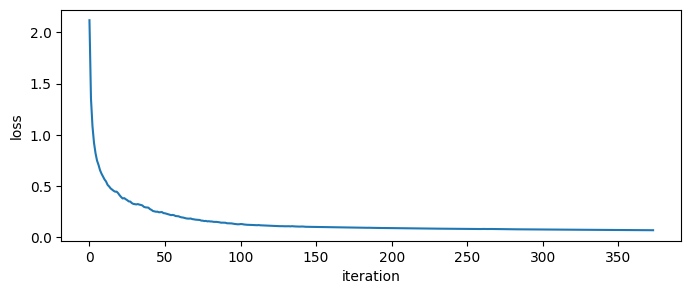

In [ ]:
plot_loss(model_01)

---